<a href="https://colab.research.google.com/github/HeberPareja/IA-MiniRobots_2024-2/blob/master/EjercicioN4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Ejercicio N° 4.3
*   Universidad Nacional de Colombia
*   Inteligencia Artificial y Mini-Robots 2024-2
*   Heber Alexander Pareja Romero
*   haparejar@unal.edu.co

# **<> Introducción**

Este código implementa un algoritmo evolutivo para optimizar la trayectoria de un robot dentro de una cuadrícula de 5x5, con el objetivo de visitar la mayor cantidad posible de ingenieros ubicados en posiciones fijas. A través de generaciones sucesivas, el programa evalúa una población de soluciones (rutas), selecciona las mejores mediante un torneo, aplica cruza y mutación para generar nuevas soluciones y repite el proceso hasta completar un número determinado de generaciones. Al final, imprime la mejor ruta encontrada junto con su puntuación y la representa gráficamente.

# <> **Desarrollo**


Mejor solución encontrada:
Puntuación = 30
Trayectoria = [(0, 0), (0, 1), (1, 1), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (4, 3), (4, 4), (4, 3), (4, 4), (4, 3), (4, 4), (4, 3), (4, 4), (4, 3), (4, 4), (4, 3), (4, 4), (4, 3)]


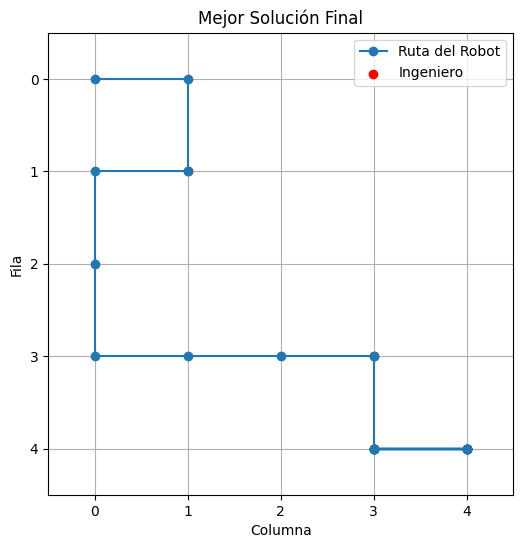

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Configuración del problema
GRID_SIZE = 5
ENGINEERS = [(1, 1), (3, 3), (4, 4)]
MAX_GENERATIONS = 20
POPULATION_SIZE = 10
MAX_PROGRAM_LENGTH = 10
MUTATION_RATE = 0.2

# Movimientos posibles
MOVES = {
    "N": (-1, 0),
    "S": (1, 0),
    "E": (0, 1),
    "W": (0, -1),
    "Stay": (0, 0),
}

# Generar un programa aleatorio
def random_program():
    return [random.choice(list(MOVES.keys())) for _ in range(random.randint(1, MAX_PROGRAM_LENGTH))]

# Ejecutar un programa y calcular la aptitud
def execute_program(program):
    x, y = 0, 0  # Posición inicial del robot
    visited = set()
    trajectory = [(x, y)]
    score = 0

    for move in program:
        dx, dy = MOVES[move]
        new_x, new_y = x + dx, y + dy

        # Mantener al robot dentro de la cuadrícula
        new_x = max(0, min(GRID_SIZE - 1, new_x))
        new_y = max(0, min(GRID_SIZE - 1, new_y))

        # Evitar moverse al mismo lugar repetidamente
        if (new_x, new_y) == (x, y):
            continue

        x, y = new_x, new_y
        trajectory.append((x, y))

        # Si hay un ingeniero en la posición actual y no ha sido visitado
        if (x, y) in ENGINEERS and (x, y) not in visited:
            score += 10
            visited.add((x, y))

    return score, trajectory

# Evaluar la población
def evaluate_population(population):
    scores = []
    trajectories = []
    for program in population:
        score, trajectory = execute_program(program)
        scores.append(score)
        trajectories.append(trajectory)
    return scores, trajectories

# Selección por torneo
def tournament_selection(population, scores):
    tournament_size = 3
    best_program = None
    best_score = -float("inf")
    for _ in range(tournament_size):
        idx = random.randint(0, len(population) - 1)
        if scores[idx] > best_score:
            best_score = scores[idx]
            best_program = population[idx]
    return best_program

# Crossover entre dos programas
def crossover(program1, program2):
    point1 = random.randint(0, len(program1) - 1)
    point2 = random.randint(0, len(program2) - 1)
    child = program1[:point1] + program2[point2:]
    return child

# Mutación de un programa
def mutate(program):
    if random.random() < MUTATION_RATE:
        if random.random() < 0.5 and program:
            # Cambiar un movimiento existente
            idx = random.randint(0, len(program) - 1)
            program[idx] = random.choice(list(MOVES.keys()))
        else:
            # Agregar un nuevo movimiento
            program.append(random.choice(list(MOVES.keys())))
    return program

# Graficar la trayectoria
def plot_trajectory(trajectory, title):
    x, y = zip(*trajectory)
    plt.figure(figsize=(6, 6))
    plt.plot(y, x, marker="o", label="Ruta del Robot")
    for ex, ey in ENGINEERS:
        plt.scatter(ey, ex, c="red", label="Ingeniero" if (ex, ey) == ENGINEERS[0] else "")
    plt.xlim(-0.5, GRID_SIZE - 0.5)
    plt.ylim(-0.5, GRID_SIZE - 0.5)
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.legend()
    plt.title(title)
    plt.xlabel("Columna")
    plt.ylabel("Fila")
    plt.show()

# Inicialización de la población
population = [random_program() for _ in range(POPULATION_SIZE)]

# Ciclo evolutivo
for _ in range(MAX_GENERATIONS):
    # Evaluar la población
    scores, trajectories = evaluate_population(population)

    # Selección de los mejores individuos
    new_population = []
    for _ in range(POPULATION_SIZE):
        parent1 = tournament_selection(population, scores)
        parent2 = tournament_selection(population, scores)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)

    population = new_population

# Mejor individuo final
final_scores, final_trajectories = evaluate_population(population)
best_idx = np.argmax(final_scores)
print("\nMejor solución encontrada:")
print(f"Puntuación = {final_scores[best_idx]}")
print(f"Trayectoria = {final_trajectories[best_idx]}")
plot_trajectory(final_trajectories[best_idx], "Mejor Solución Final")

# **<> Conclusiones**

El algoritmo evolutivo implementado demuestra ser una estrategia efectiva para optimizar la trayectoria de un robot en un entorno delimitado, maximizando su capacidad para visitar ingenieros dentro de la cuadrícula. A través de la selección, cruza y mutación, la población de soluciones evoluciona progresivamente hacia rutas más eficientes. Sin embargo, la calidad de la solución final depende de la configuración de los parámetros, como el tamaño de la población, la tasa de mutación y el número de generaciones. Este enfoque es aplicable a problemas similares de optimización de rutas en entornos restringidos, aunque podría beneficiarse de mejoras como un refinamiento local o ajustes adaptativos de los parámetros evolutivos.